In [2]:
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

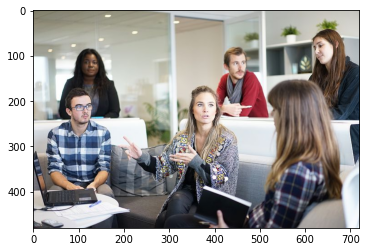

In [147]:
meeting_img = plt.imread('./photos/1.jpg')
plt.imshow(meeting_img)

In [193]:
def facecrop(image):
    save_path = './photos/split'
    sub_faces = []
    
    facedata = sys.argv[1]
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    img = plt.imread(image) 
    #Note: In the case of color images, the decoded images will have the channels stored in B G R order.
    #print(img.shape[1],img.shape[0])
    
    minisize = (img.shape[1],img.shape[0])
    miniframe = cv2.resize(img, minisize)

    faces = cascade.detectMultiScale(miniframe)
    counter = 0
    for f in faces:
        x, y, w, h = [ v for v in f ]
        #cv2.rectangle(img, (x,y), (x+w,y+h), (255,255,255))

        sub_face = img[y:y+h, x:x+w]
        sub_faces.append(sub_face)
        #f_entire_name, ext = os.path.splitext(image)
        f_base_name = os. path. basename(image)
        fname, ext = os.path.splitext(f_base_name)
        #cv2.imwrite(fname+"_cropped_"+str(counter)+ext, sub_face)
        cv2.imwrite(os.path.join(save_path , fname+"_cropped_"+str(counter)+ext), 
                    cv2.cvtColor(sub_face, cv2.COLOR_RGB2BGR))
        counter += 1
    return sub_faces, counter

In [194]:
faces_arr, face_count = facecrop("./photos/1.jpg")

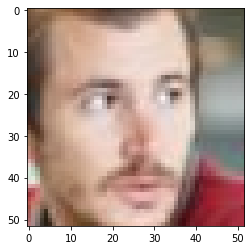

In [195]:
plt.imshow(faces_arr[2])
#plt.imshow(faces_arr[2])

In [196]:
faces_arr[2].shape

(52, 52, 3)

In [197]:
_faces_arr = []
for i in range(face_count):
    #face_RGB = cv2.cvtColor(faces_arr[i], cv2.COLOR_BGR2RGB)
    face_RGB = faces_arr[i]
    face = cv2.resize(face_RGB,(100,100))
    _faces_arr.append(face)

In [198]:
_faces_arr[2].shape

(100, 100, 3)

In [199]:
np_faces_arr = np.array(_faces_arr)

In [200]:
np_faces_arr.shape

(5, 100, 100, 3)

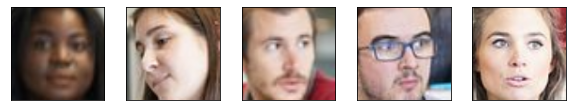

In [201]:
fig = plt.figure(figsize=(10,10))
# fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(face_count):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_faces_arr[i])
plt.show()